내가 준비한 데이터는 [Heart Failure Prediction Dataset](https://www.kaggle.com/fedesoriano/heart-failure-prediction/discussion)이다.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
heart_df = pd.read_csv('./heart.csv')

In [3]:
heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [4]:
heart_df.shape

(918, 12)

이 데이터 셋에는 총 12개의 column이 존재한다.


나는 이 중 각종 매체에서 쉽게 접해서 익숙한 HeartDisease, Cholestrol, MaxHR 컬럼을 주로 선택하여 이 프로젝트를 진행하고자 한다.


## 가설 설정
- HeartDisease는 Cholestrol이 높을 수록 발병 확률이 높아진다.
- MaxHR이 높을수록 HeartDisease 발병 확률도 높아진다.
- MaxHR과 Cholestrol은 Sex에 따른 구분이 없다.
- MaxHR과 Cholestrol은 Age와 비슷한 증가추세를 보이더라도 급격한 변화량은 보이지 않을 것이다.


In [5]:
heart_df.count()

Age               918
Sex               918
ChestPainType     918
RestingBP         918
Cholesterol       918
FastingBS         918
RestingECG        918
MaxHR             918
ExerciseAngina    918
Oldpeak           918
ST_Slope          918
HeartDisease      918
dtype: int64

In [6]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


불러온 데이터에는 모든 Column에 결측치가 존재하지 않음을 알게되었다.  

그러나 한 번 더 체크해보도록 하자.

In [7]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object



이제 가설 검증을 시작하기 위해 피어슨 상관계수를 구해보자.

In [9]:
heart_df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


위 (피어슨)상관계수를 γ이라고 하자.   
γ는 그 절댓값이 0.1이하 일때는 거의 무시되며 0.1과 0.3 사이는 약한 선형 관계, 0.3초과 0.7 이하에는 뚜렷한 선형관계, 0.7과 1 사이에 해당하면 강한 선형관계가 있다고 해석한다. 대체적으로 0.3이하의 경우에는 큰 차이가 없다.


하지만 그 이전에 그 상관계수 γ 값에 상관없이 t검정 통계량을 통해 얻은 p-value 값이 0.05 이하여야 구한 상관계수를 유의미하다고 인정할 수 있다.
> 귀무가설 : 모집단의의 대해 옳다고 제안하는 잠정적인 주장  
> 대립가설 : 귀무가설이 거짓이라면 대안적으로 참이 되는 가설  
> p-value : 귀무가설이 사실인데도 불구하고 사실이 아니라고 판정할 때 실제 확률   


이 상관관계에서 내가 선택한 attribute 쌍들을 선택하여 p_value를 확인해보자.

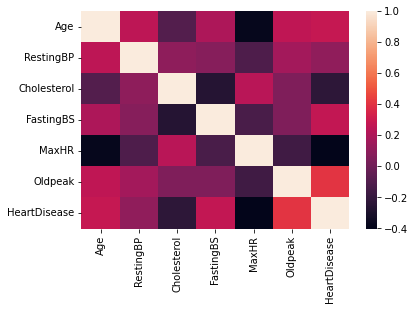

In [10]:
sns.heatmap(heart_df.corr())
plt.show()

In [11]:
from scipy import stats

H_DS = heart_df.HeartDisease
HR = heart_df.MaxHR
CO = heart_df.Cholesterol


result_HR = stats.ttest_ind(H_DS, HR)
result_CO = stats.ttest_ind(H_DS, CO)

print("관상동맥질환과 고혈압간의 t검정 통계랑 : %.3f, p-value = %.3f"%(result_HR))
print("관상동맥질환과 콜레스테롤간의 t검정 통계랑 : %.3f, p-value = %.3f"%(result_CO))

관상동맥질환과 고혈압간의 t검정 통계랑 : -162.118, p-value = 0.000
관상동맥질환과 콜레스테롤간의 t검정 통계랑 : -54.912, p-value = 0.000


두 p-value가 모두 0.03보다 작으므로 위의 상관 계수를 활용할 수 있게 되었다.

하지만 양의 상관관계를 가질 것이라는 내 예상과는 달리,  
2개 쌍의 상관계수는 모든 음의 선형관계를 가지고 있음을 보여준다.


자세히 파악해보자.

> # HeartDisease를 앓는 사람들 수는? 

In [12]:
heart_df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

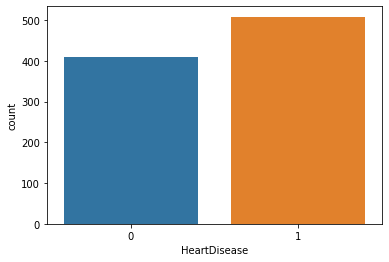

In [13]:
sns.countplot(x='HeartDisease', data = heart_df)
plt.show()

---

> # HeartDisease 여부에 따른 사람들의 최고혈압 분포는?


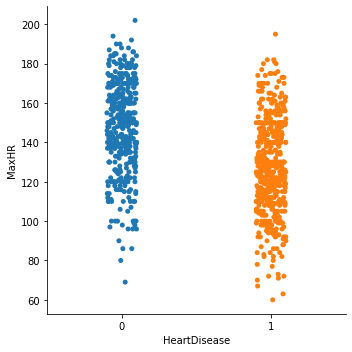

In [14]:
sns.catplot(x='HeartDisease',y='MaxHR',data=heart_df)
plt.show()

## _HeartDisease가 발병할 사람의 MaxHR 분포가 오히려 낮다_

이는 내가 세웠던 'MaxHR이 높을수록 HeartDisease 발병 확률도 높아진다.'가설이 틀렸음을 보여준다.



---

> # HeartDisease 여부에 따른 사람들의 콜레스테롤 분포는?

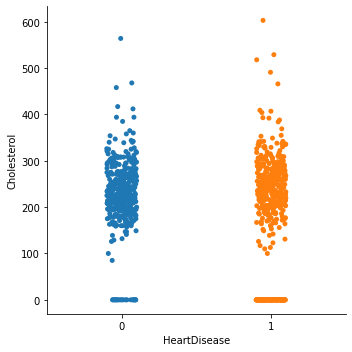

In [15]:
sns.catplot(x='HeartDisease',y='Cholesterol',data=heart_df)
plt.show()

## _HeartDisease가 발병 여부에 따른 콜레스테롤 수치 분포는 큰 차이가 없다_


이 역시 내가 세운 가설 'HeartDisease는 Cholesterol이 높을 수록 발병 확률이 높아진다.'이 틀렸음을 시각적으로 드러낸다.


---

그런 남은 가설 두 가지도 마저 확인을 해보자.

1. MaxHR과 Cholesterol은 Sex에 따른 구분이 없다.
2. MaxHR과 Cholesterol은 Age와 비슷한 증가추세를 보이더라도 급격한 변화량은 보이지 않을 것이다.

> # 1. MaxHR + Sex 

In [16]:
heart_df[['Sex','MaxHR']].groupby(['Sex']).count() # 남성 데이터가 더 많음

,MaxHR
Sex,
F,193
M,725


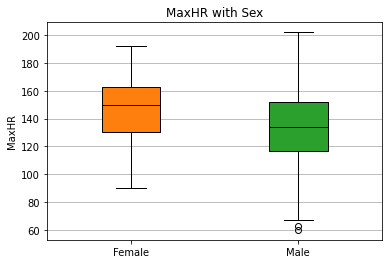

In [17]:
F_HR = heart_df[heart_df.Sex == 'F']['MaxHR']
M_HR = heart_df[heart_df.Sex == 'M']['MaxHR']

colors = ['tab:orange', 'tab:green', 'tab:blue', 'tab:red', 'tab:purple', 'tab:pink', 'tab:olive', 'tab:cyan', 'tab:gray']

fig, ax = plt.subplots()

f_bp = ax.boxplot(F_HR,
                labels=['Female'],
                positions = [1],
                widths = 0.35, #  박스의 폭을 조절
                patch_artist=True, # <---- 박스의 속성을 바꿀 수 있도록 설정한다
                boxprops=dict(facecolor=colors[0], color='k'), # 박스의 face와 가장자리 색을 지정
                medianprops=dict(color='k')
                )
m_bp = ax.boxplot(M_HR,
                labels=['Male'],
                positions = [2],
                widths = 0.35, #  박스의 폭을 조절
                patch_artist=True, # <---- 박스의 속성을 바꿀 수 있도록 설정한다
                boxprops=dict(facecolor=colors[1], color='k'), # 박스의 face와 가장자리 색을 지정
                medianprops=dict(color='k')
                )
plt.title("MaxHR with Sex")
plt.ylabel("MaxHR")
plt.grid(color='grey', linestyle='-', linewidth=0.5, axis='y')
plt.show()

> # 1. Cholesterol + Sex 

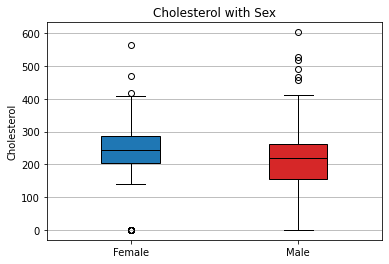

In [18]:
F_CO = heart_df[heart_df.Sex == 'F']['Cholesterol']
M_CO = heart_df[heart_df.Sex == 'M']['Cholesterol']

fig, ax = plt.subplots()

f_bp = ax.boxplot(F_CO,
                labels=['Female'],
                positions = [1],
                widths = 0.35, #  박스의 폭을 조절
                patch_artist=True, # <---- 박스의 속성을 바꿀 수 있도록 설정한다
                boxprops=dict(facecolor=colors[2], color='k'), # 박스의 face와 가장자리 색을 지정
                medianprops=dict(color='k')
                )
m_bp = ax.boxplot(M_CO,
                labels=['Male'],
                positions = [2],
                widths = 0.35, #  박스의 폭을 조절
                patch_artist=True, # <---- 박스의 속성을 바꿀 수 있도록 설정한다
                boxprops=dict(facecolor=colors[3], color='k'), # 박스의 face와 가장자리 색을 지정
                medianprops=dict(color='k')
                )
plt.title("Cholesterol with Sex")
plt.ylabel('Cholesterol')
plt.grid(color='grey', linestyle='-', linewidth=0.5, axis='y')
plt.show()

In [19]:
new_sex = heart_df[['Sex', 'MaxHR','Cholesterol']]

new_sex.loc[new_sex.Sex=='F','Sex'] = 1
new_sex.loc[new_sex.Sex=='M','Sex'] = 0

new_sex.head(5)


C:\Users\User\anaconda3\envs\KDT_AI3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Sex,MaxHR,Cholesterol
0,0,172,289
1,1,156,180
2,0,98,283
3,1,108,214
4,0,122,195


In [20]:
r1 = stats.pearsonr(new_sex['Sex'],new_sex['MaxHR'])
print("성별과 고혈압 상관계수 : %.3f, p-value : %f"%(r1))

r2 = stats.pearsonr(new_sex['Sex'],new_sex['Cholesterol'])
print("성별과 콜레스테롤 상관계수 : %.3f, p-value : %f"%(r2))


성별과 고혈압 상관계수 : 0.189, p-value : 0.000000
성별과 콜레스테롤 상관계수 : 0.200, p-value : 0.000000


그림 상으로는 성별에 따라 분포의 차이가 약간 존재하는 것으로 보이나, 확신을 할 수 없으므로 다시 한번 상관계수와 p-value를 구했다.


## _여성일 수록 MaxHR과 Cholesterol이 높은 경향성을 보이기는 하나 아주 약한 선형관계이므로 거의 구분이 없다._


따라서 가설 'MaxHR과 Cholesterol은 Sex에 따른 구분이 없다.'는 옳다고 할 수 있을 것이다.


> # 2. MaxHR + Age

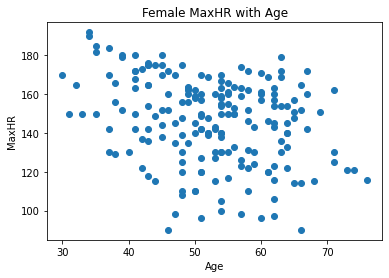

In [21]:
F_age = heart_df[heart_df.Sex == "F"]['Age']

plt.scatter(F_age,F_HR)
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.title("Female MaxHR with Age")
plt.show()

In [22]:
re1 = stats.pearsonr(F_age,F_HR)
print(" 상관계수 : %.3f, p-value : %f"%(re1))

 상관계수 : -0.306, p-value : 0.000016


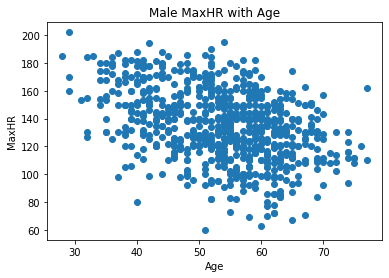

 상관계수 : -0.397, p-value : 0.000000


In [23]:
M_age = heart_df[heart_df.Sex == "M"]['Age']

plt.scatter(M_age,M_HR)
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.title("Male MaxHR with Age")
plt.show()

re1 = stats.pearsonr(M_age,M_HR)
print(" 상관계수 : %.3f, p-value : %f"%(re1))

## _MaxHR과 Age는 서로 반대의 추세를 보이며 주목할 만한 선형관계를 가지고 있다._


'MaxHR과 Cholesterol은 Age와 비슷한 증가추세를 보이더라도 급격한 변화량은 보이지 않을 것이다.'라는 마지막 가설은 이미 틀렸다.


> # 2. Cholesterol + Age

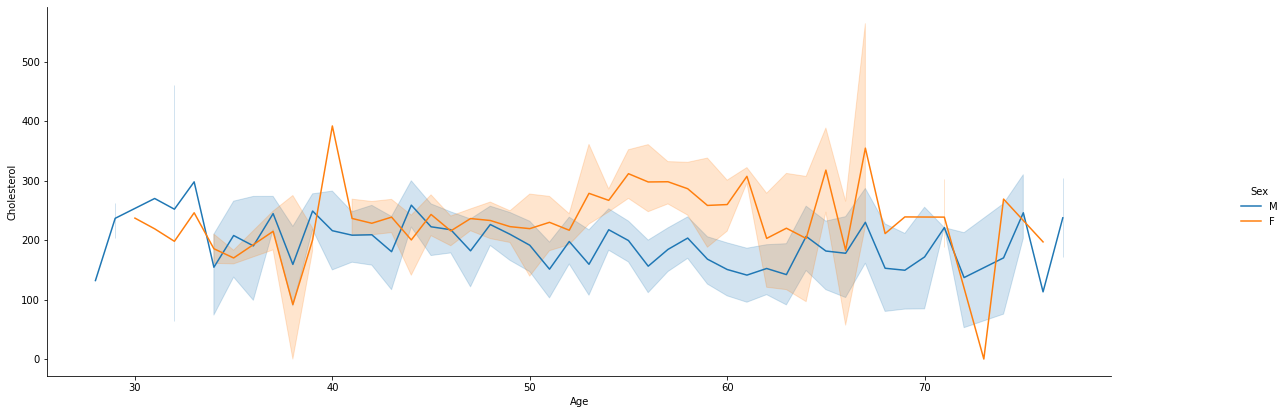

남성의 나이와 콜레스테롤 수치의 상관계수 : -0.131, p-value : 0.000402
여성의 나이와 콜레스테롤 수치의 상관계수 : 0.132, p-value : 0.066515


In [24]:
s = sns.relplot(x='Age',y='Cholesterol',hue='Sex',kind='line',data=heart_df)
s.fig.set_size_inches(20,6)
plt.show()

re2 = stats.pearsonr(M_age,M_CO)
re3 = stats.pearsonr(F_age,F_CO)
print("남성의 나이와 콜레스테롤 수치의 상관계수 : %.3f, p-value : %f"%(re2))
print("여성의 나이와 콜레스테롤 수치의 상관계수 : %.3f, p-value : %f"%(re3))

## _남성은 Cholesterol와 Age가 서로 반대의 추세를 보이며 약한 선형관계를 가지고 있다._
## _여성은 Cholesterol와 Age의 상관관계는 p-value값이 0.05보다 크므로 사용할 수 없다._


'MaxHR과 Cholesterol은 Age와 비슷한 증가추세를 보이더라도 급격한 변화량은 보이지 않을 것이다.'   


---

이렇게 마지막 가설까지 모두 확인을 끝마쳤다.


1. ~~HeartDisease는 Cholestrol이 높을 수록 발병 확률이 높아진다.~~
2. ~~MaxHR이 높을수록 HeartDisease 발병 확률도 높아진다.~~
3. <mark>MaxHR과 Cholestrol은 Sex에 따른 구분이 없다.</mark>
4. ~~MaxHR과 Cholestrol은 Age와 비슷한 증가추세를 보이더라도 급격한 변화량은 보이지 않을 것이다.~~

내가 초기에 세운 가설 중 설득력이 있는 가설은 'MaxHR과 Cholestrol은 Sex에 따른 구분이 없다.'가 유일했다.

